In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [1, 0, 0, 1], [0, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0, 1, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 1]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:975
number of class2:642

 ****** Running generation 0 ****** 

Population's average fitness: 0.48784 stdev: 0.08738
Best fitness: 0.71861 - size: (2, 13) - species 5 - id 98
Average adjusted fitness: 0.154
Mean genetic distance 2.932, standard deviation 0.464
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 20.324 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54955 stdev: 0.08633
Best fitness: 0.72542 - size: (3, 15) - species 17 - id 316
Average adjusted fitness: 0.216
Mean genetic distance 3.001, standard deviation 0.496
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 21.530 sec (20.927 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56686 stdev: 0.08314
Best fitness: 0.72542 - size: (3, 15) - species 17 - id 316
Average adjusted fitness: 0.208
Mean genetic distance 3.037, standard deviation 0.498
Population of 201 members in 26 species
Total extin

Population's average fitness: 0.61597 stdev: 0.10199
Best fitness: 0.76252 - size: (4, 19) - species 21 - id 2744
Average adjusted fitness: 0.283
Mean genetic distance 3.156, standard deviation 0.527
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 48.383 sec (31.519 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61925 stdev: 0.09719
Best fitness: 0.77551 - size: (6, 22) - species 21 - id 3799
Average adjusted fitness: 0.239
Mean genetic distance 3.135, standard deviation 0.533
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 39.707 sec (33.109 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63558 stdev: 0.09750
Best fitness: 0.77551 - size: (6, 22) - species 21 - id 3799
Average adjusted fitness: 0.245
Mean genetic distance 3.159, standard deviation 0.526
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 36.812 sec (33.952 average)

 

Population's average fitness: 0.61822 stdev: 0.09694
Best fitness: 0.77551 - size: (6, 22) - species 21 - id 3799
Average adjusted fitness: 0.224
Mean genetic distance 3.281, standard deviation 0.551
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 41.591 sec (41.497 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.62810 stdev: 0.09908
Best fitness: 0.77551 - size: (6, 22) - species 21 - id 3799
Average adjusted fitness: 0.297
Mean genetic distance 3.269, standard deviation 0.562
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 42.293 sec (41.648 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62183 stdev: 0.09728
Best fitness: 0.77551 - size: (6, 22) - species 21 - id 3799
Average adjusted fitness: 0.222
Mean genetic distance 3.283, standard deviation 0.553
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 44.784 sec (42.041 average)

 

Population's average fitness: 0.62514 stdev: 0.09198
Best fitness: 0.79406 - size: (8, 28) - species 21 - id 11514
Average adjusted fitness: 0.226
Mean genetic distance 3.212, standard deviation 0.574
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 54.726 sec (47.195 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.63671 stdev: 0.09016
Best fitness: 0.79406 - size: (8, 28) - species 21 - id 11514
Average adjusted fitness: 0.265
Mean genetic distance 3.221, standard deviation 0.580
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 48.962 sec (47.782 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.61605 stdev: 0.09945
Best fitness: 0.79406 - size: (8, 28) - species 21 - id 11514
Average adjusted fitness: 0.267
Mean genetic distance 3.242, standard deviation 0.553
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 54.172 sec (48.891 average)

Population's average fitness: 0.61436 stdev: 0.10773
Best fitness: 0.79406 - size: (8, 28) - species 21 - id 11514
Average adjusted fitness: 0.245
Mean genetic distance 3.115, standard deviation 0.562
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 42.201 sec (41.067 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.60462 stdev: 0.11716
Best fitness: 0.79406 - size: (8, 28) - species 21 - id 11514
Average adjusted fitness: 0.210
Mean genetic distance 3.110, standard deviation 0.559
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 42.416 sec (41.337 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.62947 stdev: 0.10217
Best fitness: 0.79406 - size: (8, 28) - species 21 - id 11514
Average adjusted fitness: 0.225
Mean genetic distance 3.110, standard deviation 0.565
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 40.759 sec (41.289 average)

Population's average fitness: 0.62964 stdev: 0.11108
Best fitness: 0.79406 - size: (8, 28) - species 21 - id 11514
Average adjusted fitness: 0.247
Mean genetic distance 3.057, standard deviation 0.591
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 43.511 sec (43.230 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.63570 stdev: 0.10751
Best fitness: 0.79406 - size: (8, 28) - species 21 - id 11514
Average adjusted fitness: 0.241
Mean genetic distance 3.058, standard deviation 0.584
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 43.508 sec (43.097 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.63113 stdev: 0.11200
Best fitness: 0.79406 - size: (8, 28) - species 21 - id 11514
Average adjusted fitness: 0.281
Mean genetic distance 3.044, standard deviation 0.573
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 42.767 sec (42.971 averag

Population's average fitness: 0.62014 stdev: 0.11201
Best fitness: 0.79406 - size: (8, 28) - species 21 - id 11514
Average adjusted fitness: 0.222
Mean genetic distance 2.889, standard deviation 0.564
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 48.747 sec (47.763 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.62036 stdev: 0.11814
Best fitness: 0.79406 - size: (8, 28) - species 21 - id 11514
Average adjusted fitness: 0.219
Mean genetic distance 2.911, standard deviation 0.552
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 50.885 sec (48.270 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.62936 stdev: 0.10739
Best fitness: 0.79406 - size: (8, 28) - species 21 - id 11514
Average adjusted fitness: 0.235
Mean genetic distance 2.926, standard deviation 0.559
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 50.034 sec (48.667 averag

Population's average fitness: 0.61597 stdev: 0.09925
Best fitness: 0.77860 - size: (6, 23) - species 15 - id 1922
Average adjusted fitness: 0.252
Mean genetic distance 3.242, standard deviation 0.505
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 26.618 sec (26.283 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62357 stdev: 0.08986
Best fitness: 0.77860 - size: (6, 23) - species 15 - id 1922
Average adjusted fitness: 0.220
Mean genetic distance 3.234, standard deviation 0.514
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 27.385 sec (26.526 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62910 stdev: 0.09223
Best fitness: 0.77860 - size: (6, 23) - species 15 - id 1922
Average adjusted fitness: 0.248
Mean genetic distance 3.233, standard deviation 0.526
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 27.188 sec (26.744 average)

 

Population's average fitness: 0.61007 stdev: 0.09973
Best fitness: 0.78788 - size: (7, 24) - species 15 - id 4637
Average adjusted fitness: 0.228
Mean genetic distance 3.328, standard deviation 0.574
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 30.048 sec (29.826 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.61514 stdev: 0.09734
Best fitness: 0.78788 - size: (7, 24) - species 15 - id 4637
Average adjusted fitness: 0.219
Mean genetic distance 3.339, standard deviation 0.553
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 30.247 sec (29.958 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.61338 stdev: 0.09898
Best fitness: 0.78788 - size: (7, 24) - species 15 - id 4637
Average adjusted fitness: 0.239
Mean genetic distance 3.348, standard deviation 0.565
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 30.729 sec (30.145 average)

 

Population's average fitness: 0.62329 stdev: 0.09520
Best fitness: 0.79963 - size: (9, 28) - species 15 - id 9716
Average adjusted fitness: 0.328
Mean genetic distance 3.347, standard deviation 0.563
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 36.796 sec (35.790 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.61447 stdev: 0.10344
Best fitness: 0.79963 - size: (9, 28) - species 15 - id 9716
Average adjusted fitness: 0.217
Mean genetic distance 3.336, standard deviation 0.563
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 38.422 sec (36.278 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.62994 stdev: 0.09100
Best fitness: 0.81076 - size: (9, 29) - species 15 - id 10391
Average adjusted fitness: 0.234
Mean genetic distance 3.317, standard deviation 0.563
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 39.186 sec (36.727 average)



Population's average fitness: 0.63782 stdev: 0.10452
Best fitness: 0.81880 - size: (10, 31) - species 15 - id 13108
Average adjusted fitness: 0.257
Mean genetic distance 3.192, standard deviation 0.556
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 37.635 sec (37.020 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.64464 stdev: 0.09580
Best fitness: 0.81880 - size: (10, 31) - species 15 - id 13108
Average adjusted fitness: 0.288
Mean genetic distance 3.155, standard deviation 0.581
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 37.866 sec (37.131 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.65119 stdev: 0.09973
Best fitness: 0.81880 - size: (10, 31) - species 15 - id 13108
Average adjusted fitness: 0.265
Mean genetic distance 3.153, standard deviation 0.557
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 39.394 sec (37.410 avera

Population's average fitness: 0.63789 stdev: 0.10538
Best fitness: 0.81880 - size: (10, 31) - species 15 - id 13108
Average adjusted fitness: 0.345
Mean genetic distance 3.210, standard deviation 0.580
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 39.499 sec (40.892 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.64165 stdev: 0.09873
Best fitness: 0.81880 - size: (10, 31) - species 15 - id 13108
Average adjusted fitness: 0.303
Mean genetic distance 3.198, standard deviation 0.595
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 40.073 sec (40.828 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.64241 stdev: 0.09642
Best fitness: 0.81880 - size: (10, 31) - species 15 - id 13108
Average adjusted fitness: 0.246
Mean genetic distance 3.186, standard deviation 0.590
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 41.388 sec (40.937 ave

Population's average fitness: 0.65181 stdev: 0.09852
Best fitness: 0.81880 - size: (10, 31) - species 15 - id 13108
Average adjusted fitness: 0.241
Mean genetic distance 3.184, standard deviation 0.606
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 47.003 sec (46.649 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.64256 stdev: 0.10171
Best fitness: 0.81880 - size: (10, 31) - species 15 - id 13108
Average adjusted fitness: 0.350
Mean genetic distance 3.178, standard deviation 0.611
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 46.592 sec (46.767 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.63898 stdev: 0.09643
Best fitness: 0.81880 - size: (10, 31) - species 15 - id 13108
Average adjusted fitness: 0.333
Mean genetic distance 3.167, standard deviation 0.615
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 46.555 sec (46.957 ave

Population's average fitness: 0.63142 stdev: 0.08341
Best fitness: 0.76500 - size: (4, 17) - species 22 - id 1446
Average adjusted fitness: 0.244
Mean genetic distance 3.173, standard deviation 0.473
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 27.489 sec (25.068 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62367 stdev: 0.09431
Best fitness: 0.76500 - size: (4, 17) - species 22 - id 1446
Average adjusted fitness: 0.355
Mean genetic distance 3.160, standard deviation 0.481
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 27.399 sec (25.415 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62451 stdev: 0.09034
Best fitness: 0.76500 - size: (4, 17) - species 22 - id 1446
Average adjusted fitness: 0.322
Mean genetic distance 3.163, standard deviation 0.480
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 28.768 sec (25.866 average)

 

Population's average fitness: 0.62567 stdev: 0.10371
Best fitness: 0.80087 - size: (10, 31) - species 7 - id 4266
Average adjusted fitness: 0.259
Mean genetic distance 3.227, standard deviation 0.555
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 31.506 sec (30.950 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.64154 stdev: 0.09823
Best fitness: 0.80087 - size: (10, 31) - species 7 - id 4266
Average adjusted fitness: 0.251
Mean genetic distance 3.235, standard deviation 0.551
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 32.439 sec (31.211 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.63348 stdev: 0.10176
Best fitness: 0.80087 - size: (10, 31) - species 7 - id 4266
Average adjusted fitness: 0.234
Mean genetic distance 3.231, standard deviation 0.557
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 31.929 sec (31.362 average)

 

Population's average fitness: 0.64315 stdev: 0.09609
Best fitness: 0.80705 - size: (11, 31) - species 7 - id 6570
Average adjusted fitness: 0.238
Mean genetic distance 3.281, standard deviation 0.613
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 36.322 sec (35.254 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.64874 stdev: 0.09389
Best fitness: 0.80705 - size: (11, 31) - species 7 - id 6570
Average adjusted fitness: 0.289
Mean genetic distance 3.292, standard deviation 0.613
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 34.617 sec (35.214 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.65340 stdev: 0.09403
Best fitness: 0.82004 - size: (14, 35) - species 31 - id 9402
Average adjusted fitness: 0.282
Mean genetic distance 3.272, standard deviation 0.627
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 35.148 sec (35.122 average)



Population's average fitness: 0.66102 stdev: 0.09114
Best fitness: 0.83117 - size: (16, 36) - species 49 - id 11121
Average adjusted fitness: 0.302
Mean genetic distance 3.078, standard deviation 0.597
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 38.191 sec (38.016 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.65629 stdev: 0.09856
Best fitness: 0.83117 - size: (16, 36) - species 49 - id 11121
Average adjusted fitness: 0.255
Mean genetic distance 3.131, standard deviation 0.586
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 38.475 sec (38.203 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.65103 stdev: 0.09759
Best fitness: 0.83117 - size: (16, 36) - species 49 - id 11121
Average adjusted fitness: 0.247
Mean genetic distance 3.109, standard deviation 0.558
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 39.398 sec (38.400 avera

Population's average fitness: 0.66144 stdev: 0.09435
Best fitness: 0.85900 - size: (20, 48) - species 54 - id 15674
Average adjusted fitness: 0.296
Mean genetic distance 3.219, standard deviation 0.570
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 43.565 sec (43.421 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.65682 stdev: 0.10523
Best fitness: 0.85900 - size: (20, 48) - species 54 - id 15674
Average adjusted fitness: 0.262
Mean genetic distance 3.207, standard deviation 0.569
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 44.368 sec (43.674 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.66532 stdev: 0.09953
Best fitness: 0.85900 - size: (20, 48) - species 54 - id 15674
Average adjusted fitness: 0.296
Mean genetic distance 3.191, standard deviation 0.578
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 45.679 sec (44.110 ave

Population's average fitness: 0.64844 stdev: 0.09637
Best fitness: 0.85900 - size: (20, 48) - species 54 - id 15674
Average adjusted fitness: 0.250
Mean genetic distance 3.135, standard deviation 0.544
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 45.075 sec (45.089 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.65045 stdev: 0.09993
Best fitness: 0.85900 - size: (20, 48) - species 54 - id 15674
Average adjusted fitness: 0.354
Mean genetic distance 3.137, standard deviation 0.561
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 43.296 sec (44.868 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.66177 stdev: 0.09183
Best fitness: 0.85900 - size: (20, 48) - species 54 - id 15674
Average adjusted fitness: 0.275
Mean genetic distance 3.123, standard deviation 0.555
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 43.658 sec (44.578 ave

Population's average fitness: 0.59048 stdev: 0.08267
Best fitness: 0.76005 - size: (5, 17) - species 9 - id 1122
Average adjusted fitness: 0.248
Mean genetic distance 3.102, standard deviation 0.482
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 25.643 sec (22.967 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60082 stdev: 0.08566
Best fitness: 0.76438 - size: (4, 18) - species 25 - id 1244
Average adjusted fitness: 0.193
Mean genetic distance 3.141, standard deviation 0.479
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 25.576 sec (23.293 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61053 stdev: 0.08273
Best fitness: 0.76994 - size: (5, 16) - species 9 - id 1382
Average adjusted fitness: 0.225
Mean genetic distance 3.143, standard deviation 0.474
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 24.213 sec (23.395 average)

 ****

Population's average fitness: 0.62598 stdev: 0.09413
Best fitness: 0.78850 - size: (7, 20) - species 6 - id 4274
Average adjusted fitness: 0.213
Mean genetic distance 3.210, standard deviation 0.522
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 29.897 sec (28.882 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63087 stdev: 0.09123
Best fitness: 0.79716 - size: (9, 28) - species 25 - id 4571
Average adjusted fitness: 0.200
Mean genetic distance 3.191, standard deviation 0.530
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 29.456 sec (29.054 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63003 stdev: 0.09331
Best fitness: 0.79716 - size: (9, 28) - species 25 - id 4571
Average adjusted fitness: 0.227
Mean genetic distance 3.234, standard deviation 0.533
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 29.730 sec (29.277 average)

 *

Population's average fitness: 0.64867 stdev: 0.09445
Best fitness: 0.79716 - size: (9, 28) - species 25 - id 4571
Average adjusted fitness: 0.227
Mean genetic distance 3.278, standard deviation 0.560
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 35.422 sec (33.639 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64869 stdev: 0.09211
Best fitness: 0.79716 - size: (9, 28) - species 25 - id 4571
Average adjusted fitness: 0.212
Mean genetic distance 3.281, standard deviation 0.554
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 34.423 sec (33.865 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.64677 stdev: 0.09721
Best fitness: 0.79716 - size: (9, 28) - species 25 - id 4571
Average adjusted fitness: 0.237
Mean genetic distance 3.290, standard deviation 0.560
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 35.100 sec (34.192 average)

 

Population's average fitness: 0.65510 stdev: 0.10144
Best fitness: 0.80025 - size: (11, 31) - species 25 - id 9656
Average adjusted fitness: 0.348
Mean genetic distance 3.333, standard deviation 0.602
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 35.703 sec (35.406 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.65533 stdev: 0.10245
Best fitness: 0.80025 - size: (11, 31) - species 25 - id 9656
Average adjusted fitness: 0.236
Mean genetic distance 3.345, standard deviation 0.605
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 35.333 sec (35.378 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.65225 stdev: 0.09976
Best fitness: 0.80025 - size: (11, 31) - species 25 - id 9656
Average adjusted fitness: 0.168
Mean genetic distance 3.330, standard deviation 0.608
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 35.002 sec (35.343 average)

Population's average fitness: 0.66246 stdev: 0.09558
Best fitness: 0.80458 - size: (11, 31) - species 61 - id 13011
Average adjusted fitness: 0.293
Mean genetic distance 3.099, standard deviation 0.603
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 40.224 sec (39.082 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.66493 stdev: 0.09326
Best fitness: 0.80458 - size: (11, 31) - species 61 - id 13011
Average adjusted fitness: 0.206
Mean genetic distance 3.049, standard deviation 0.584
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 40.271 sec (39.475 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.66814 stdev: 0.09065
Best fitness: 0.80458 - size: (11, 31) - species 61 - id 13011
Average adjusted fitness: 0.240
Mean genetic distance 3.064, standard deviation 0.570
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 41.099 sec (39.835 ave

Population's average fitness: 0.66952 stdev: 0.09239
Best fitness: 0.80705 - size: (10, 29) - species 60 - id 20273
Average adjusted fitness: 0.317
Mean genetic distance 2.936, standard deviation 0.631
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 34.065 sec (37.305 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.66087 stdev: 0.10018
Best fitness: 0.80705 - size: (10, 29) - species 60 - id 20273
Average adjusted fitness: 0.301
Mean genetic distance 2.895, standard deviation 0.620
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 33.703 sec (36.488 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.66320 stdev: 0.09804
Best fitness: 0.80705 - size: (10, 29) - species 60 - id 20273
Average adjusted fitness: 0.207
Mean genetic distance 2.909, standard deviation 0.599
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 33.679 sec (35.657 ave

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.4888888888888889

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[14  0  0  0  1  0  0  0  1  6]
 [ 0  0  0  6  0  0  0  0  0  4]
 [ 0  2 15  1  0  0  5  0  0  0]
 [ 0  0  1  3  2  3  1  0  0  1]
 [ 1  1  0  0 12  1  0  0  1  1]
 [ 0  5  0  0  2 14  2  8  0  0]
 [ 0  0  0  3  0  0 10  0  3  0]
 [ 0  6  1  3  3  0  0 10  5  0]
 [ 0  5  0  1  0  0  0  1  6  2]
 [ 1  0  0  1  0  0  0  0  1  4]]


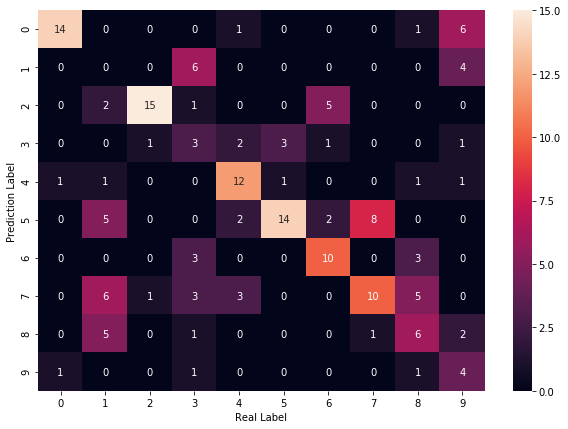

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[5] real:5
#1 min_error:0 index:[3] real:2
#2 min_error:1 index:[2 7 8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[5] real:1
#5 min_error:0 index:[5] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[1] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:0 index:[5] real:1
#10 min_error:0 index:[5] real:7
#11 min_error:1 index:[4 7 8] real:4
#12 min_error:0 index:[5] real:6
#13 min_error:0 index:[1] real:3
#14 min_error:0 index:[5] real:1
#15 min_error:0 index:[1] real:3
#16 min_error:1 index:[4 7 8] real:9
#17 min_error:0 index:[7] real:1
#18 min_error:1 index:[2 7 8] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[8] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[1] real:3
#23 min_error:0 index:[5] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[2] real:6
#29 min_error:0 index:[3] real:9
#30 

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.5658627087198516
Avg Base Learner:0.8280766852195423


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1111111111111111
Accuracy on training set: 0.17777777777777778
Accuracy on training set: 0.23333333333333334
Accuracy on training set: 0.25555555555555554


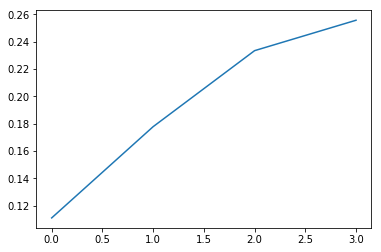

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.1111111111111111,
 0.17777777777777778,
 0.23333333333333334,
 0.25555555555555554]